# Jaguar ReID Dataset Overview

In [12]:
import torch
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

from jaguar.datasets import get_data, EmbeddingDataset
from jaguar.embedding_models import MegaDescriptor


In [4]:
DATA_DIR = Path("../data/")
EMBEDDINGS_DIR = Path("../embeddings/")
VALIDATION_SPLIT_SIZE = 0.2
SEED = 42

torch.manual_seed(SEED)
np.random.seed(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Class Label Visualization

In [5]:
train_data, val_data, test_query, test_gallery, num_classes, label_encoder = get_data(
    DATA_DIR,
    validation_split_size=VALIDATION_SPLIT_SIZE,
    seed=SEED,
)
display(train_data.head())
display(val_data.head())
display(test_query.head())
display(test_gallery.head())

,filename,ground_truth,label_encoded
1372,../data/train/train/train_1373.png,Ousado,20
775,../data/train/train/train_0776.png,Kwang,15
1094,../data/train/train/train_1095.png,Marcela,18
1784,../data/train/train/train_1785.png,Ti,29
112,../data/train/train/train_0113.png,Benita,6


,filename,ground_truth,label_encoded
1066,../data/train/train/train_1067.png,Marcela,18
1068,../data/train/train/train_1069.png,Marcela,18
1515,../data/train/train/train_1516.png,Overa,21
664,../data/train/train/train_0665.png,Kamaikua,13
528,../data/train/train/train_0529.png,Jaju,12


,row_id,query_image,gallery_image,filename,label_encoded
0,0,test_0001.png,test_0002.png,../data/test/test/test_0001.png,-1
1,1,test_0001.png,test_0003.png,../data/test/test/test_0001.png,-1
2,2,test_0001.png,test_0004.png,../data/test/test/test_0001.png,-1
3,3,test_0001.png,test_0005.png,../data/test/test/test_0001.png,-1
4,4,test_0001.png,test_0006.png,../data/test/test/test_0001.png,-1


,row_id,query_image,gallery_image,filename,label_encoded
0,0,test_0001.png,test_0002.png,../data/test/test/test_0002.png,-1
1,1,test_0001.png,test_0003.png,../data/test/test/test_0003.png,-1
2,2,test_0001.png,test_0004.png,../data/test/test/test_0004.png,-1
3,3,test_0001.png,test_0005.png,../data/test/test/test_0005.png,-1
4,4,test_0001.png,test_0006.png,../data/test/test/test_0006.png,-1


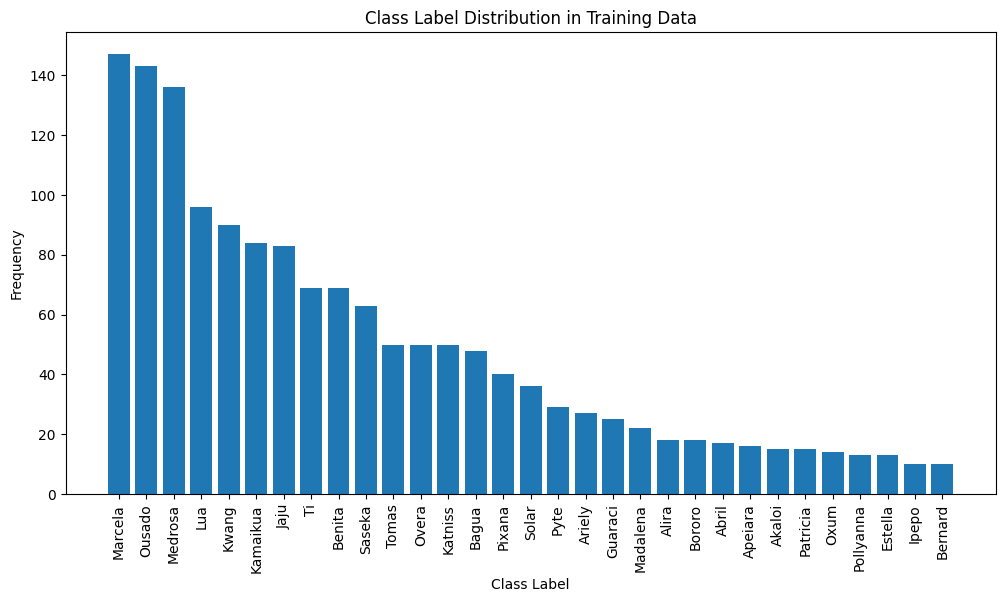

In [16]:
class_counts = train_data["ground_truth"].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.title("Class Label Distribution in Training Data")
plt.show()

In [ ]:
embedding_model = MegaDescriptor(device=device)
train_dataset = EmbeddingDataset(train_data, embedding_model=embedding_model, key="train", cache_folder=EMBEDDINGS_DIR)
val_dataset = EmbeddingDataset(val_data, embedding_model=embedding_model, key="val", cache_folder=EMBEDDINGS_DIR)